Text(0.5, 1.0, 'Convergence between 1950 and 1975 in the OECD (except Korea)')

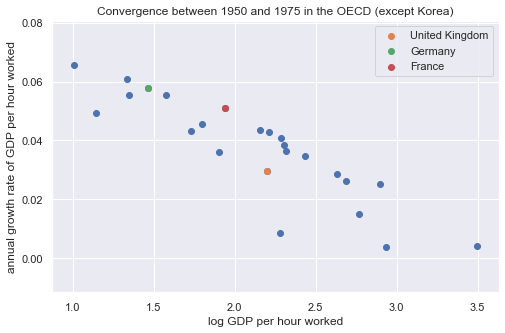

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('pwt91.dta')

oecd = ['AUS','AUT','BEL','CAN','CHE','DEU','DNK','ESP','FIN','FRA','GBR','GRC','IRE','ISL','ITA','JPN','LUX','MEX','NLD','NOR','NZL','PRT','SWE','TUR','USA']

df = df[df['countrycode'].isin(oecd)]

df['level'] = df['rgdpe']/(df['avh']*df['emp'])
df['growth'] = df['rgdpna']/(df['avh']*df['emp'])

table = pd.pivot_table(df,index='year',columns='countrycode',values=['level','growth','hc','csh_i']).fillna(method='bfill')
growth = np.log(table.loc[1975,'growth']/table.loc[1950,'growth'])/25
level = np.log(table.loc[1950,'level'])
hc = np.log(table.loc[1950:1975,'hc']).mean()
inv = table.loc[1950:1975,'csh_i'].mean()

plt.figure(figsize=(8,5))
plt.scatter(level,growth,label='__nolabel__')
plt.scatter(level.loc['GBR'],growth.loc['GBR'],label='United Kingdom')
plt.scatter(level.loc['DEU'],growth.loc['DEU'],label='Germany')
plt.scatter(level.loc['FRA'],growth.loc['FRA'],label='France')
plt.legend()
plt.xlabel('log GDP per hour worked')
plt.ylabel('annual growth rate of GDP per hour worked')
plt.title('Convergence between 1950 and 1975 in the OECD (except Korea)')

In [64]:
data = pd.DataFrame(index=oecd,columns=['growth','level','hc','inv'])
data['growth'] = growth
data['level'] = level
data['hc'] = hc
data['inv'] = inv

data.head()

,growth,level,hc,inv
AUS,0.026296,2.687361,1.039833,0.335697
AUT,0.045667,1.798873,0.929002,0.210364
BEL,0.040761,2.283184,0.839937,0.291426
CAN,0.034661,2.435813,0.991037,0.246601
CHE,0.028701,2.628823,1.119148,0.360178


In [65]:
import statsmodels.formula.api as smf

res = smf.ols('growth ~ level + hc + inv',data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     42.59
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           7.14e-09
Time:                        14:21:50   Log-Likelihood:                 87.769
No. Observations:                  24   AIC:                            -167.5
Df Residuals:                      20   BIC:                            -162.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0748      0.008      8.971      0.000       0.057       0.092
level         -0.0270      0.002    -11.292      0.000      -0.032      -0.022
hc             0.0214      0.007      3.182      0.005       0.007       0.035
inv            0.0079      0.026      0.299      0.768      -0.047       0.063
==============================================================================
Omnibus:                        3.859   Durbin-Watson:                   2.717
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.393
Skew:                          -0.753   Prob(JB):                        0.302
Kurtosis:                       3.356   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

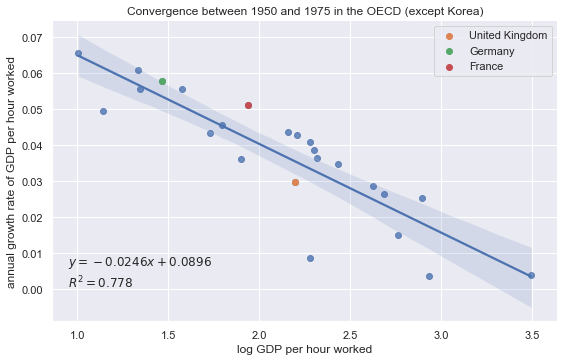

In [66]:
sns.lmplot(x='level',y='growth',data=data,height=5,aspect=16/10)
plt.scatter(level.loc['GBR'],growth.loc['GBR'],label='United Kingdom')
plt.scatter(level.loc['DEU'],growth.loc['DEU'],label='Germany')
plt.scatter(level.loc['FRA'],growth.loc['FRA'],label='France')
plt.text(0.95,0.0005,'$y=-0.0246x+0.0896$\n$R^2=0.778$')
plt.legend()
plt.xlabel('log GDP per hour worked')
plt.ylabel('annual growth rate of GDP per hour worked')
plt.title('Convergence between 1950 and 1975 in the OECD (except Korea)')
plt.savefig('oecd_convergence.png',dpi=200)

In [67]:
res.predict(data)

AUS    0.027063
AUT    0.047702
BEL    0.033356
CAN    0.032112
CHE    0.030532
DEU    0.059610
DNK    0.035004
ESP    0.054929
FIN    0.048791
FRA    0.041794
GBR    0.037756
GRC    0.054718
IRE         NaN
ISL    0.018933
ITA    0.048680
JPN    0.070493
LUX   -0.004527
MEX    0.035496
NLD    0.037507
NOR    0.040439
NZL    0.020443
PRT    0.051743
SWE    0.035152
TUR    0.019753
USA    0.020779
dtype: float64